<a href="https://colab.research.google.com/github/Rafael-JP/Ejemplos-de-clase/blob/main/Feynman_examples/planetary_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example section 9.7 Feynman Lectures on Physics
Planetary motion (arb. units with GM=1).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initial conditions:

In [2]:
x0=0.5
y0=0.0
vx0=0.0
vy0=1.63

We take, as in the book, a time step of 0.1 and the calculation was done for 21 steps.

In [3]:
dt = 0.1
ntot=21

print('Simulation time will be',dt*ntot)

Simulation time will be 2.1


Create empty arrays for all the results and add the initial conditions at t=0

In [4]:
# create empty array starting at zero with time, position, velocity
x = np.zeros(ntot+1)
y = np.zeros(ntot+1)
vx = np.zeros(ntot+1)
vy = np.zeros(ntot+1)
t = np.zeros(ntot+1)

#Initial conditions
t[0] = 0.0
x[0] = x0
y[0] = y0
vx[0] = vx0
vy[0] = vy0

#Distance of planet from star and calculation of acceleration
r_sun=np.sqrt(x[0]*x[0]+y[0]*y[0])
ax = -x[0]/(r_sun**3.0)
ay = -y[0]/(r_sun**3.0)

print("At t=0, r=",r_sun)

At t=0, r= 0.5


The first step is special as explained in the book:

In [5]:
#  Calculate new velocity after time dt/2
vx_hk = vx[0]+(dt/2.0)*ax
vy_hk = vy[0]+(dt/2.0)*ay
print("Half Step: vx=",vx_hk," vy=",vy_hk)

Half Step: vx= -0.2  vy= 1.63


In [6]:
# New position at step 1 time t+dt
i=1
x[i] = x[i-1]+dt*vx_hk
y[i] = y[i-1]+dt*vy_hk
t[i] = t[i-1]+dt
r_sun=np.sqrt(x[i]*x[i]+y[i]*y[i])
ax = -x[i]/(r_sun**3.0)
ay = -y[i]/(r_sun**3.0)
print("step",i,"t=",t[i],", x=",x[i],"y=",y[i],"r=",r_sun)

step 1 t= 0.1 , x= 0.48 y= 0.163 r= 0.5069210983969793


Now we perform an iteration over all subsequent times

In [7]:
while i<ntot:
    # Calculate acceleration at present position x(t)
    r_sun=np.sqrt(x[i]*x[i]+y[i]*y[i])
    ax = -x[i]/(r_sun**3.0)
    ay = -y[i]/(r_sun**3.0)
	  #Velocity change from t-dt/2 to t+dt/2
    vx_hk = vx_hk+ax*dt
    vy_hk = vy_hk+ay*dt
    # New position at t+dt
    x[i+1] = x[i]+dt*vx_hk
    y[i+1] = y[i]+dt*vy_hk
    #Update time
    t[i+1] = t[i]+dt
    #update counter
    i=i+1
	  #print current data
    print('t= ',round(t[i],3),' x=',round(x[i],3),' y=',round(y[i],3))

t=  0.2  x= 0.423  y= 0.313
t=  0.3  x= 0.337  y= 0.443
t=  0.4  x= 0.232  y= 0.546
t=  0.5  x= 0.115  y= 0.623
t=  0.6  x= -0.006  y= 0.676
t=  0.7  x= -0.127  y= 0.706
t=  0.8  x= -0.244  y= 0.718
t=  0.9  x= -0.356  y= 0.713
t=  1.0  x= -0.461  y= 0.694
t=  1.1  x= -0.558  y= 0.664
t=  1.2  x= -0.646  y= 0.623
t=  1.3  x= -0.725  y= 0.573
t=  1.4  x= -0.795  y= 0.516
t=  1.5  x= -0.856  y= 0.453
t=  1.6  x= -0.908  y= 0.385
t=  1.7  x= -0.95  y= 0.313
t=  1.8  x= -0.982  y= 0.238
t=  1.9  x= -1.005  y= 0.16
t=  2.0  x= -1.018  y= 0.081
t=  2.1  x= -1.022  y= 0.002


Plot the results

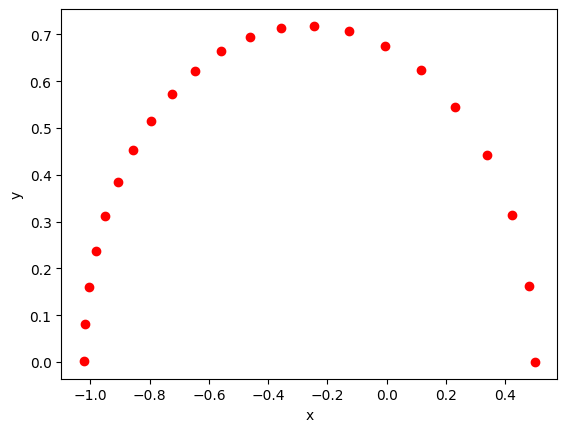

In [8]:
plt.plot(x,y, 'ro')

plt.xlabel('x')
plt.ylabel('y')

plt.show()